# RemoveOutlier

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
data=pd.read_csv("mobile_sales.csv")
data

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online
...,...,...,...,...,...,...,...,...,...,...,...
995,41f08915-addb-4966-8628-038c479c619a,2024-01-28,challenge,Brooks Ltd,1386.69,76,28865.70,39,Male,Ronaldchester,Credit Card
996,bcfa1912-5bd8-4894-900f-376fa48f022d,2024-07-13,least,"Lang, Brown and Stone",1159.26,59,50471.42,21,Other,West Jenniferport,Credit Card
997,e6839305-a177-4cda-aada-3ac1f49eeeec,2024-01-13,enjoy,"Atkinson, Moore and Nelson",544.31,59,1381.82,26,Female,Barneschester,Credit Card
998,12f7ac32-9063-4ae5-a122-385b06ba77af,2024-01-25,half,"Kim, Maxwell and Moore",331.98,84,8557.32,20,Male,Jonesborough,Online


In [6]:
data.describe()

,Price,UnitsSold,TotalRevenue,CustomerAge
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,807.512970,50.074000,40218.445040,41.141000
std,402.489878,28.616804,32715.290358,13.528346
min,103.320000,1.000000,116.850000,18.000000
25%,458.037500,25.000000,13316.037500,29.000000
50%,823.730000,51.000000,30860.655000,41.000000
75%,1157.875000,75.000000,60770.435000,53.000000
max,1499.250000,99.000000,141411.840000,64.000000


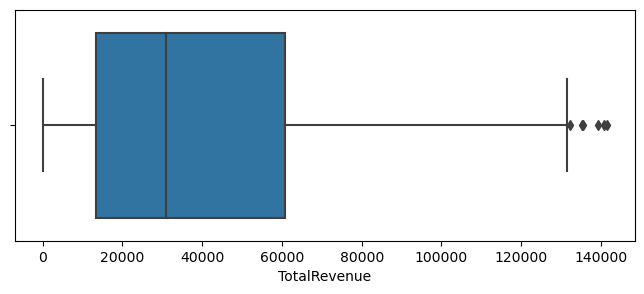

In [9]:
plt.figure(figsize=(8,3))
sns.boxplot(x="TotalRevenue",data=data)
plt.show()

In [12]:
q1=data["TotalRevenue"].quantile(0.25)
q3=data["TotalRevenue"].quantile(0.75)
q1,q3

(13316.0375, 60770.435)

In [13]:
IQR=q3-q1
IQR

47454.3975

In [14]:
min=q1-(1.5 * IQR)
max=q3+(1.5* IQR)
min ,max

(-57865.558750000004, 131952.03125)

In [22]:
new_dataset=data[data["TotalRevenue"]<= max]
new_dataset.head(10)

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online
5,f7e98db9-cb87-453e-8179-e48ba5443932,2024-03-07,idea,"Massey, Nicholson and Young",1498.13,70,9703.89,45,Female,Port Daryl,Debit Card
6,61f1c03f-5527-49bf-88f6-0d8694e72d41,2024-07-13,southern,Coleman-Pena,975.77,63,8300.22,23,Other,Kathrynborough,Online
7,55d74ccb-e3c0-4ceb-a102-6d553736b944,2024-03-18,top,"Brock, Cruz and Santiago",530.70,79,4515.80,26,Female,Kyleborough,Online
8,889bd479-e06a-494d-baae-e099bea5469c,2024-04-12,anything,"Griffin, Boyle and Dawson",178.52,58,36150.93,20,Female,Jacquelinestad,Debit Card
9,567c276b-fec4-47e4-b5be-71f2b79bd745,2024-04-19,wall,"Arroyo, Jones and Clayton",774.79,92,24228.27,33,Male,South Jessicachester,Online


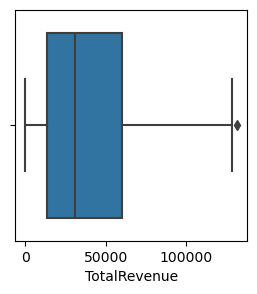

In [21]:
plt.figure(figsize=(3,3))
sns.boxplot(x="TotalRevenue",data=new_dataset)
plt.show()